<a href="https://colab.research.google.com/github/akhilesh-kanmanthreddy/brain_tumor_diagnosing_system/blob/main/Brain_Tumor_Severity_Estimation_Flint_Regional_Science_and_Engineering_Fair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libraries

In [ ]:
#installing API's
!pip install tensorflow opencv-python matplotlib
!pip list

In [ ]:
#Importing dependencies
import tensorflow as tf
import os

# Removing bad images

In [ ]:
#removing dogey images
import cv2
import imghdr
data_dir = '/content/drive/MyDrive/severity dataset' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Loading Data


Found 2660 files belonging to 2 classes.


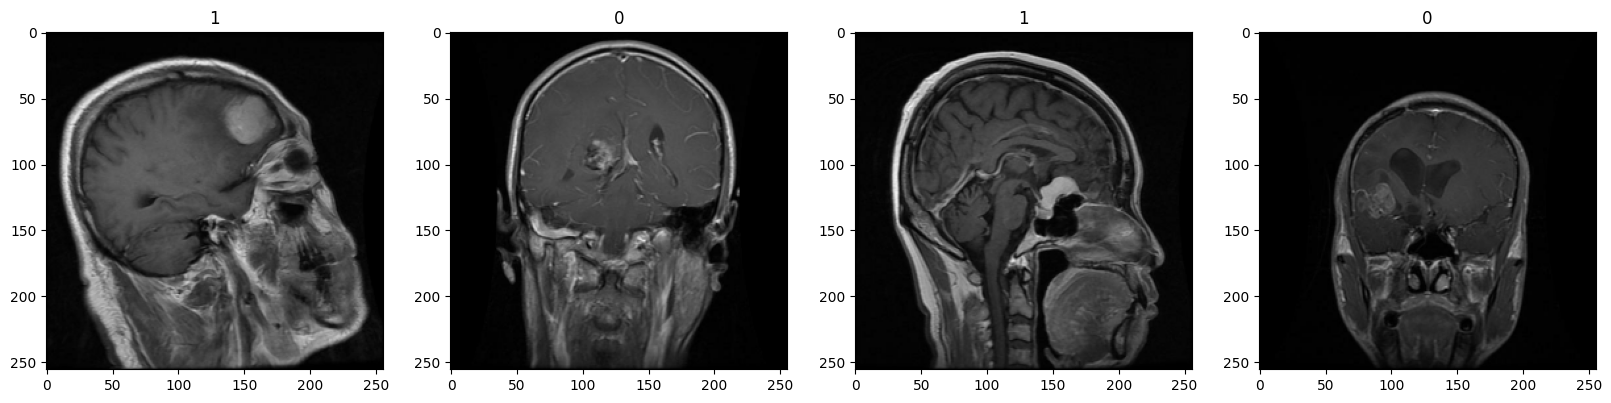

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/severity dataset')


data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scaling Data


In [ ]:
#scaling data
data = data.map(lambda x,y: (x/255, y))
scaled_iterator =data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].min()

0.0

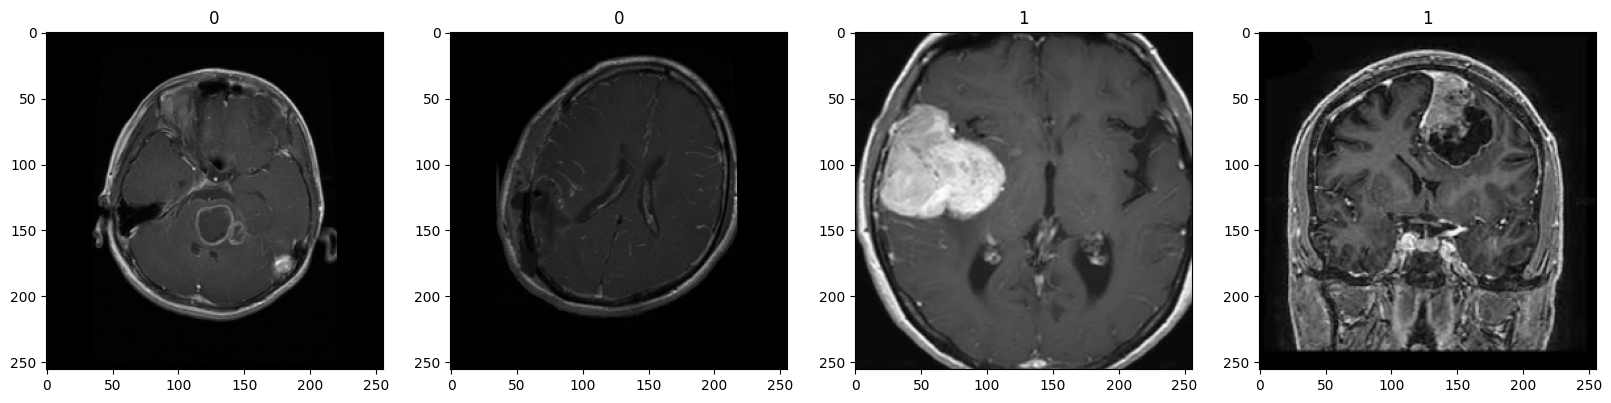

In [ ]:
#plotting data
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train_size

58

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Creating Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()

In [ ]:
#Best model 
model.add(Conv2D(16, (4,4), 1, activation='tanh', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (4,4), 1, activation='tanh'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (4,4), 1, activation='tanh'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Training

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
58/58 [==============================] - 209s 4s/step - loss: 0.9073 - accuracy: 0.6816 - val_loss: 0.4511 - val_accuracy: 0.7852
Epoch 2/20
58/58 [==============================] - 195s 3s/step - loss: 0.3875 - accuracy: 0.8270 - val_loss: 0.3600 - val_accuracy: 0.8262
Epoch 3/20
58/58 [==============================] - 197s 3s/step - loss: 0.2787 - accuracy: 0.8966 - val_loss: 0.3288 - val_accuracy: 0.8711
Epoch 4/20
58/58 [==============================] - 202s 3s/step - loss: 0.2500 - accuracy: 0.8960 - val_loss: 0.2885 - val_accuracy: 0.8711
Epoch 5/20
58/58 [==============================] - 196s 3s/step - loss: 0.1589 - accuracy: 0.9386 - val_loss: 0.2528 - val_accuracy: 0.8945
Epoch 6/20
58/58 [==============================] - 216s 4s/step - loss: 0.1229 - accuracy: 0.9547 - val_loss: 0.2024 - val_accuracy: 0.9141
Epoch 7/20
58/58 [==============================] - 202s 3s/step - loss: 0.0757 - accuracy: 0.9784 - val_loss: 0.3355 - val_accuracy: 0.8730
Epoch 8/20
58

# Metrics


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 1s 652ms/step
tf.Tensor(0.92622954, shape=(), dtype=float32) tf.Tensor(0.875969, shape=(), dtype=float32) tf.Tensor(0.90234375, shape=(), dtype=float32)


# testing

In [ ]:
import cv2

In [ ]:
#/content/drive/MyDrive/data /yes/ynumber.jpg
#/content/drive/MyDrive/data /no/nnumber.jpg
img = cv2.imread("/content/drive/MyDrive/Screenshot 2023-03-30 112611.png")
plt.imshow(img)
plt.show

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize.shape

In [ ]:
np.expand_dims(resize, 0).shape

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
tem

In [ ]:
if yhat > 80:
  print("there is a " + yhat + "% that your brain tumor is a Meningioma")
else:
  print("there is a" + 100-yhat "% chance that your brain tumor is a Glioblastoma")